In [ ]:
!pip install numpy matplotlib sympy tensorflow[and-cuda] seaborn > /dev/null 2>&1


---
##### Title: Optimization using Random Search Methods
##### Author: Ujjayant Kadian
##### Date: 2025-04-04
---


# Introduction

This notebook explores the implementation of optimization algorithms for machine learning, specifically focusing on how global and population-based random search methods are utilized to optimize two functions from the [week-4 assignment](https://github.com/ujjayant-kadian/optimizations-algorithms-for-data-analysis/blob/main/week-4/week-4.ipynb). Additionally, it applies these techniques to fine-tune hyperparameters for a convolutional neural network (CNN), enhancing its performance on the CIFAR-10 dataset.

## Table of Contents
 
1. **Section 1: CNN on CIFAR‑10 with Additional Cost Function Evaluation**
   - Loading the CIFAR‑10 dataset
   - Constructing and training a convolutional neural network (CNN)
   - Evaluating the model by calculating cross‑entropy loss and AUC on the test data
 
2. **Section 2: Global Random Search Algorithm**
   - Implementing a global random search algorithm that randomly samples parameter vectors using uniform distributions within specified bounds and tracks the best solution.

3. **Section 3: Population-Based Random Search**
   - Extending the approach with a population-based random search, retaining the M best candidates, sampling new candidates in their neighborhoods, and repeating the process.

4. **Section 4: Optimization of Simple Functions**
   - Utilizing both random search methods to optimize two simple functions (from week 4) and comparing their performance with gradient descent, including generating contour plots to visualize the search paths.

5. **Section 5: Hyperparameter Optimization for CNN**
   - Applying both random search methods to select hyperparameters for the CNN and comparing their performance.
 
---


Note: The following code checks for available GPU devices and configures TensorFlow to use the first GPU, enabling memory growth to optimize resource usage.



In [3]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  tf.config.set_visible_devices(gpus[0], 'GPU')
  tf.config.experimental.set_memory_growth(gpus[0], True)
print("GPU is available: ", tf.config.list_physical_devices('GPU'))

GPU is available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]



## Section 1: CNN on CIFAR‑10 with Additional Cost Function Evaluation

This section involves loading CIFAR‑10, constructing a convolutional network, training the model, and calculating the cross‑entropy loss and AUC on the test data.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
Training data shape: (5000, 32, 32, 3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,146 (145.10 KB)

 Trainable params: 37,146 (145.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - accuracy: 0.1162 - loss: 2.3372 - val_accuracy: 0.2860 - val_loss: 2.0739
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2624 - loss: 2.0597 - val_accuracy: 0.3520 - val_loss: 1.8583
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3527 - loss: 1.8622 - val_accuracy: 0.4040 - val_loss: 1.7501
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4014 - loss: 1.7509 - val_accuracy: 0.4060 - val_loss: 1.7110
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4044 - loss: 1.6922 - val_accuracy: 0.4260 - val_loss: 1.6702
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4284 - loss: 1.6506 - val_accuracy: 0.4420 - val_loss: 1.6291
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4406 - loss: 1.6015 - val_accuracy: 0.4720 - val_loss: 1.6099
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4461 - loss: 1.5737 - val_accuracy: 0.4440 - val_lo

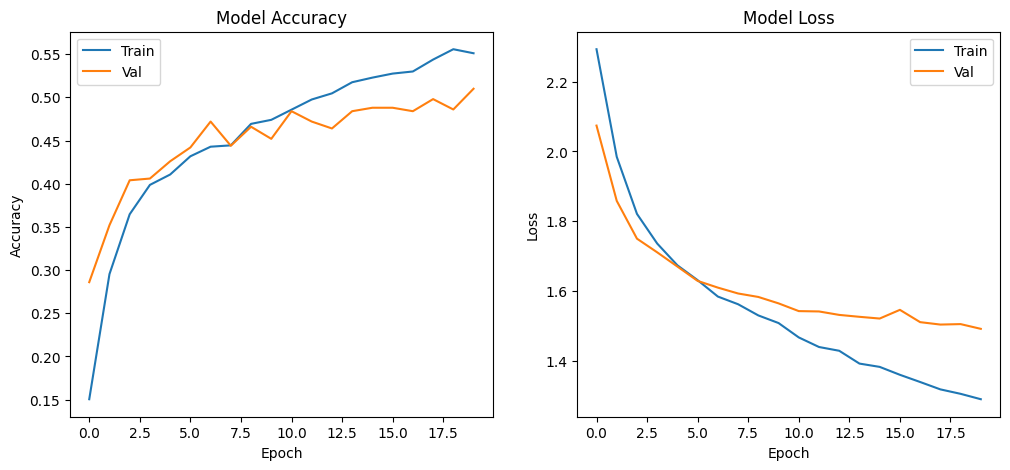

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report (Train):
              precision    recall  f1-score   support

           0       0.61      0.67      0.64       505
           1       0.62      0.79      0.69       460
           2       0.57      0.46      0.51       519
           3       0.53      0.52      0.52       486
           4       0.55      0.45      0.49       519
           5       0.56      0.52      0.54       488
           6       0.54      0.68      0.60       519
           7       0.70      0.57      0.63       486
           8       0.69      0.72      0.70       520
           9       0.68      0.68      0.68       498

    accuracy                           0.60      5000
   macro avg       0.60      0.60      0.60      5000
weighted avg       0.60      0.60      0.60      5000

Confusion Matrix (Train):


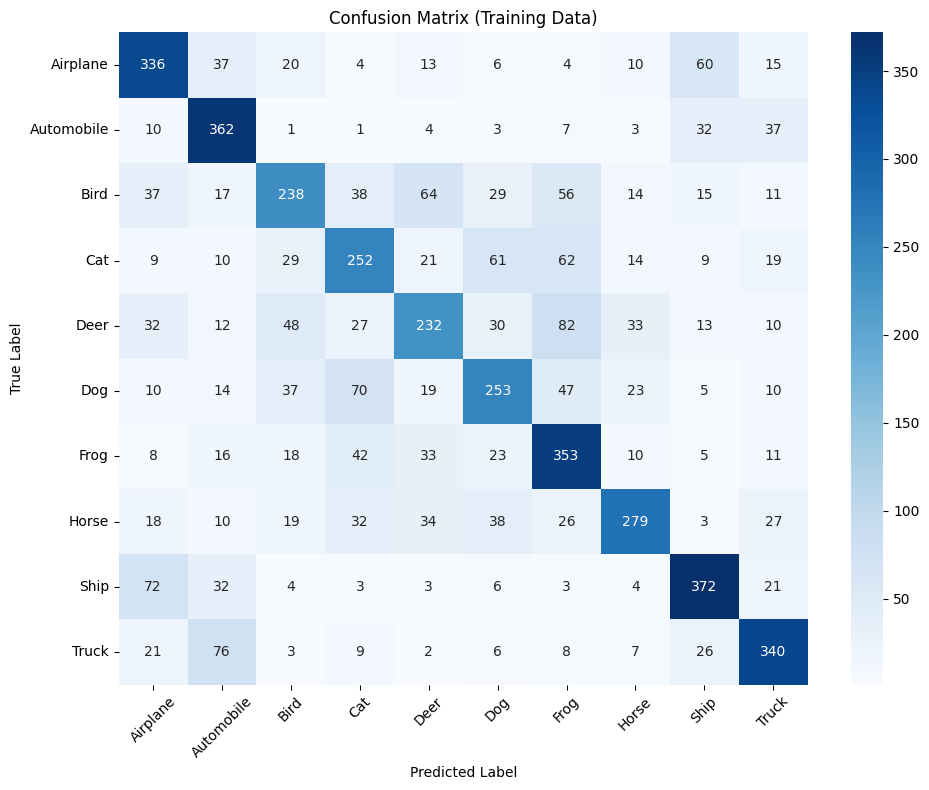

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.52      0.59      0.55      1000
           1       0.58      0.72      0.64      1000
           2       0.45      0.37      0.41      1000
           3       0.34      0.33      0.33      1000
           4       0.45      0.35      0.39      1000
           5       0.42      0.38      0.40      1000
           6       0.48      0.61      0.54      1000
           7       0.59      0.51      0.55      1000
           8       0.57      0.58      0.58      1000
           9       0.56      0.54      0.55      1000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.49     10000
weighted avg       0.50      0.50      0.49     10000

Confusion Matrix (Test):


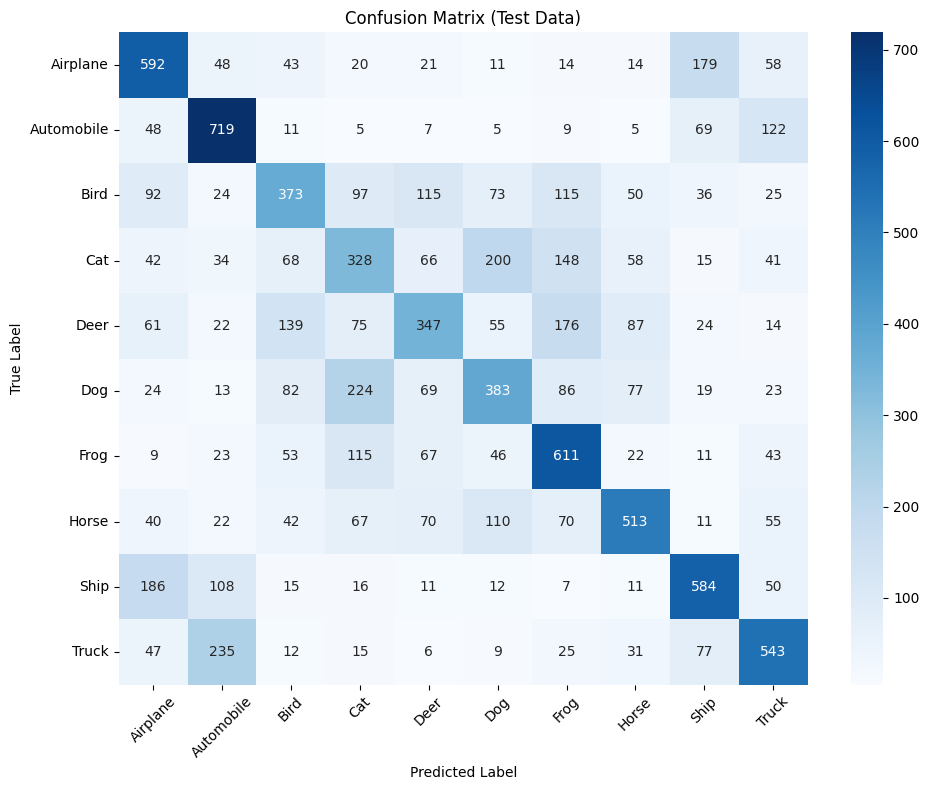


Test Cross-Entropy Loss: 1.3943
Test AUC: 0.8885


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import time
from functools import wraps
import statistics

def plot_confusion_matrix(y_true, y_pred, title):
    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create figure and axes
    plt.figure(figsize=(10, 8))

    # Create heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                            'Dog', 'Frog', 'Horse', 'Ship', 'Truck'],
                yticklabels=['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                            'Dog', 'Frog', 'Horse', 'Ship', 'Truck'])

    # Add labels and title
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n = 5000  # use a subset for faster training
x_train = x_train[:n]
y_train = y_train[:n]

# Scale images to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print("Training data shape:", x_train.shape)

# Convert class vectors to one-hot encoded labels
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

# Build the CNN model
use_saved_model = False
if use_saved_model:
    model = keras.models.load_model("cifar.model")
else:
    model = keras.Sequential([
        layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=input_shape),
        layers.Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'),
        layers.Conv2D(32, (3,3), padding='same', activation='relu'),
        layers.Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'),
        layers.Dropout(0.5),
        layers.Flatten(),
        layers.Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l1(0.0001))
    ])
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
    model.summary()

    batch_size = 128
    epochs = 20
    history = model.fit(x_train, y_train_cat, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    model.save("cifar.keras")

    # Plot training history
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Val')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Val')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Evaluate on training data
train_preds = model.predict(x_train)
y_train_pred = np.argmax(train_preds, axis=1)
print("Classification Report (Train):")
print(classification_report(np.argmax(y_train_cat, axis=1), y_train_pred))
print("Confusion Matrix (Train):")
# print(confusion_matrix(np.argmax(y_train_cat, axis=1), y_train_pred))
plot_confusion_matrix(
    np.argmax(y_train_cat, axis=1),
    y_train_pred,
    'Confusion Matrix (Training Data)'
)
# Evaluate on test data
test_preds = model.predict(x_test)
y_test_pred = np.argmax(test_preds, axis=1)
print("Classification Report (Test):")
print(classification_report(np.argmax(y_test_cat, axis=1), y_test_pred))
print("Confusion Matrix (Test):")
# print(confusion_matrix(np.argmax(y_test_cat, axis=1), y_test_pred))
plot_confusion_matrix(
    np.argmax(y_test_cat, axis=1),
    y_test_pred,
    'Confusion Matrix (Test Data)'
)

# Here we calculate the cross-entropy loss and AUC for the test set.
loss_fn = tf.keras.losses.CategoricalCrossentropy()
test_loss = loss_fn(y_test_cat, test_preds).numpy()

auc_metric = tf.keras.metrics.AUC()
auc_metric.update_state(y_test_cat, test_preds)
test_auc = auc_metric.result().numpy()

print(f"\nTest Cross-Entropy Loss: {test_loss:.4f}")
print(f"Test AUC: {test_auc:.4f}")

---

The baseline CNN evaluation on the CIFAR-10 dataset is extended by incorporating two additional metrics:

1. **Cross-Entropy Loss on Test Data**  
   This measures the average difference between the predicted probability distribution and the true distribution. It offers a more informative perspective than accuracy, particularly for multiclass classification problems. The loss was computed using:
   ```python
   loss_fn = tf.keras.losses.CategoricalCrossentropy()
   test_loss = loss_fn(y_test_cat, test_preds).numpy()
   ```

2. **AUC (Area Under the ROC Curve)**  
   The AUC score evaluates the model’s ability to rank predictions correctly across all classes. It provides a useful aggregate measure of performance across all possible classification thresholds. It was calculated as:
   ```python
   auc_metric = tf.keras.metrics.AUC()
   auc_metric.update_state(y_test_cat, test_preds)
   test_auc = auc_metric.result().numpy()
   ```

*Observations and Discussion*

- **Test Accuracy**: ~50%  
  The model achieves moderate classification accuracy using a relatively small subset of the training data (5,000 images). While this leaves room for improvement, the performance is consistent with expectations for a lightweight CNN without data augmentation.

- **Cross-Entropy Loss**: `1.3943`  
  A moderate loss value, indicating reasonable predictive confidence despite class imbalance and complexity.

- **Test AUC**: `0.8885`  
  This high value suggests that while the model may not always assign the highest probability to the correct class, it is generally effective in ranking the correct class higher than the incorrect ones.

- **Confusion Matrix Insights**:  
  - Classes such as **Automobile**, **Ship**, and **Frog** were identified with relatively high accuracy.
  - Higher confusion was observed among visually similar classes such as **Bird**, **Cat**, and **Dog**, likely due to overlapping features and limited training data.

---
## Section 2: Global Random Search Algorithm

Next, a global random search algorithm is implemented. The function

$ \texttt{global\_random\_search(cost\_func, n, bounds, N)} $

takes as input:

- **cost_func:** a function that takes a parameter vector (as a NumPy array) and returns a cost value.
- **n:** the number of parameters.
- **bounds:** a list of tuples \((l_i, u_i)\) for each parameter.
- **N:** the number of samples to draw.

It then samples a candidate vector uniformly within the bounds, evaluates the cost, and records the best candidate found.


In [3]:
def global_random_search(cost_func, n, bounds, N):
    """
    Perform global random search.

    Returns:
      best_x: best parameter vector found
      best_cost: its cost
      history: list of (candidate, cost) for each sample
    """
    start_time = time.time()
    best_cost = np.inf
    best_x = None
    history = []

    for i in range(N):
        current_time = time.time() - start_time
        candidate = np.array([np.random.uniform(low, high) for (low, high) in bounds])
        cost = cost_func(candidate)
        history.append((i, cost, candidate.copy(), current_time))

        if cost < best_cost:
            best_cost = cost
            best_x = candidate

    return best_x, best_cost, history

(a) (i) To solve the optimization problem, the Global Random Search algorithm is implemented. This method explores the search space by repeatedly sampling parameter vectors at random and evaluating the cost function.

The key steps in this implementation are:

- For each of the $N$ iterations, a random candidate vector is generated by sampling each parameter uniformly within its specified bounds $[l_i, u_i]$.

- The cost function is evaluated at this vector and compared with the best value seen so far.

- If this new cost is lower, the best solution is updated accordingly.

- The iteration index, cost, candidate vector, and elapsed time are also stored to allow later analysis of the algorithm’s performance.

This approach is simple but effective for exploring complex, non-convex spaces, as it makes no assumptions about gradient information or the shape of the cost surface. It is particularly useful when the cost function is noisy, non-differentiable, or discontinuous.

The result of this process is the best parameter vector found after $N$ random trials, along with a record of all evaluations for analysis or visualization.

---
## Section 3: Population-Based Random Search Algorithm

The previous random search is modified to a population-based version. In each iteration,
the best **M** candidate solutions from the sample of **N** candidates are kept, and new
candidates are generated in a neighbourhood of each of these **M** points.

The function below implements this iterative process.


In [4]:
def population_random_search(cost_func, n, bounds, N, M, iterations):
    """
    Perform a population-based random search.

    Parameters:
      cost_func: function mapping a parameter vector (np.array) to a cost (float)
      n: number of parameters
      bounds: list of (lower, upper) bounds for each parameter, length n
      N: number of samples per generation
      M: number of best candidates to keep
      iterations: number of generations

    Returns:
      best_x: best parameter vector found
      best_cost: its cost
      history: list of tuples (generation, best_M_points, best_M_costs)
    """
    start_time = time.time()
    # Initial random population
    population = [np.array([np.random.uniform(low, high) for (low, high) in bounds]) for _ in range(N)]
    population_costs = [cost_func(x) for x in population]
    history = []
    iteration_count = 0

    # Record initial population
    for i, (point, cost) in enumerate(zip(population, population_costs)):
        current_time = time.time() - start_time
        history.append((iteration_count, cost, point.copy(), current_time))
        iteration_count += 1

    for it in range(iterations):
        # Sort population based on cost (ascending order)
        sorted_idx = np.argsort(population_costs)
        population = [population[i] for i in sorted_idx]
        population_costs = [population_costs[i] for i in sorted_idx]

        # Keep best M candidates
        best_M = population[:M]

        # Generate new candidates in the neighbourhood of each best candidate
        new_population = []
        for point in best_M:
            for _ in range(N // M):
                candidate = np.array([
                    np.clip(point[i] + np.random.uniform(-0.1*(bounds[i][1]-bounds[i][0]),
                                                        0.1*(bounds[i][1]-bounds[i][0])),
                          bounds[i][0], bounds[i][1])
                    for i in range(n)
                ])
                new_population.append(candidate)

        population = new_population
        population_costs = [cost_func(x) for x in population]

        # Record new population
        for point, cost in zip(population, population_costs):
            current_time = time.time() - start_time
            history.append((iteration_count, cost, point.copy(), current_time))
            iteration_count += 1

    # Return the best candidate from the final population
    best_idx = np.argmin(population_costs)
    best_x = population[best_idx]
    best_cost = population_costs[best_idx]

    return best_x, best_cost, history

(b)(i) Population-Based Random Search – Explanation

To improve upon basic global random search, a **population-based random search** algorithm is implemented that evolves a population of candidate solutions over multiple generations.

The procedure begins with a randomly sampled population of $N$ parameter vectors. In each generation:

- Candidates are **evaluated using the cost function**, and the top $M$ performers (lowest cost) are selected.
- New candidates are then **generated by adding random perturbations** to these top $M$, staying within the specified parameter bounds.
- This process repeats for a fixed number of generations, and the best overall candidate is returned.

This strategy balances **exploration** (via randomness) and **exploitation** (by focusing on the best candidates), allowing the algorithm to refine solutions over time. It is especially useful in complex landscapes where purely random sampling may miss good regions.

The algorithm also tracks all candidate evaluations and costs across generations, enabling post-hoc analysis of convergence behavior.


---
## Section 4: Experiments on Test Functions $f_1$ and $f_2$

We now define two functions (from week 4):

1. $f_1(x,y)=7(x-1)^4+3(y-9)^2$
2. $f_2(x,y)=\max(x-1,0)+3|y-9|$

Both random search algorithms (global and population-based) will be used to find the minimum of these functions. For comparison, the corresponding gradient descent method (from week 4 assignment) is also provided.
  
Multiple experiments will be run (over several iterations and repeated runs) and the progress will be plotted,
including contour plots that show the search path.


In [5]:
# Define the two functions as cost functions that take a NumPy array x = [x, y]
def f1_func(x):
    return 7*(x[0]-1)**4 + 3*(x[1]-9)**2

def f2_func(x):
    return max(x[0]-1, 0) + 3*abs(x[1]-9)

def grad_f1(x):
    # Analytical gradient for f1: [28*(x-1)^3, 6*(y-9)],
    # could have used sympy to get this, but just for simplicity just borrowed from week 4 assignment
    return np.array([28*(x[0]-1)**3, 6*(x[1]-9)], dtype=float)

def grad_f2(x):
    # Subgradient for f2
    # For x: derivative of max(x-1, 0)
    if x[0] > 1:
        grad_x = 1.0
    elif x[0] < 1:
        grad_x = 0.0
    else:
        grad_x = 0.5  # subgradient at the non-differentiable point
    # For y: derivative of 3*|y-9|
    if x[1] > 9:
        grad_y = 3.0
    elif x[1] < 9:
        grad_y = -3.0
    else:
        grad_y = 0.0
    return np.array([grad_x, grad_y], dtype=float)

# Add counters for function and gradient evaluations
f1_eval_count = 0
f2_eval_count = 0
grad_f1_eval_count = 0
grad_f2_eval_count = 0

def count_calls(counter_name):
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            globals()[counter_name] += 1
            return func(*args, **kwargs)
        return wrapper
    return decorator

# Redefine the functions with call counting
@count_calls('f1_eval_count')
def f1_func_counted(x):
    return 7*(x[0]-1)**4 + 3*(x[1]-9)**2

@count_calls('f2_eval_count')
def f2_func_counted(x):
    return max(x[0]-1, 0) + 3*abs(x[1]-9)

@count_calls('grad_f1_eval_count')
def grad_f1_counted(x):
    # Analytical gradient for f1: [28*(x-1)^3, 6*(y-9)]
    return np.array([28*(x[0]-1)**3, 6*(x[1]-9)], dtype=float)

@count_calls('grad_f2_eval_count')
def grad_f2_counted(x):
    # Subgradient for f2
    if x[0] > 1:
        grad_x = 1.0
    elif x[0] < 1:
        grad_x = 0.0
    else:
        grad_x = 0.5  # subgradient at the non-differentiable point

    if x[1] > 9:
        grad_y = 3.0
    elif x[1] < 9:
        grad_y = -3.0
    else:
        grad_y = 0.0
    return np.array([grad_x, grad_y], dtype=float)

def gradient_descent(cost_func, grad_func, init, alpha=0.001, max_iter=200, tol=1e-6):
    start_time = time.time()
    x = np.array(init, dtype=float)
    history = [(0, cost_func(x), x.copy(), 0.0)]  # include time

    for it in range(1, max_iter+1):
        current_time = time.time() - start_time
        grad = grad_func(x)
        if np.linalg.norm(grad) < tol:
            break
        x = x - alpha * grad
        history.append((it, cost_func(x), x.copy(), current_time))

    return x, history

In [6]:
# Function to run multiple instances of global random search and track statistics
def run_multiple_global_random_search(cost_func, n, bounds, N, num_runs=10):
    all_runs_history = []
    best_costs = []
    total_func_evals = []
    total_times = []

    for run in range(num_runs):
        # Reset counters for each run
        if cost_func == f1_func_counted:
            globals()['f1_eval_count'] = 0
            func_counter = 'f1_eval_count'
        else:
            globals()['f2_eval_count'] = 0
            func_counter = 'f2_eval_count'

        best_x, best_cost, history = global_random_search(cost_func, n, bounds, N)

        all_runs_history.append(history)
        best_costs.append(best_cost)
        total_func_evals.append(globals()[func_counter])
        total_times.append(history[-1][3])  # Last recorded time

    return all_runs_history, best_costs, total_func_evals, total_times

# Function to run multiple instances of population-based random search
def run_multiple_population_random_search(cost_func, n, bounds, N, M, iterations, num_runs=10):
    all_runs_history = []
    best_costs = []
    total_func_evals = []
    total_times = []

    for run in range(num_runs):
        # Reset counters for each run
        if cost_func == f1_func_counted:
            globals()['f1_eval_count'] = 0
            func_counter = 'f1_eval_count'
        else:
            globals()['f2_eval_count'] = 0
            func_counter = 'f2_eval_count'

        best_x, best_cost, history = population_random_search(cost_func, n, bounds, N, M, iterations)

        all_runs_history.append(history)
        best_costs.append(best_cost)
        total_func_evals.append(globals()[func_counter])
        total_times.append(history[-1][3])  # Last recorded time

    return all_runs_history, best_costs, total_func_evals, total_times

In [7]:
# Function for plotting comparison results
def plot_optimization_comparison(gd_history, grs_histories, prs_histories, func_name, metric='iterations'):
    plt.figure(figsize=(12, 6))

    # Extract data based on the metric (iterations, func_evals, or time)
    if metric == 'iterations':
        x_gd = [it for it, _, _, _ in gd_history]
        y_gd = [cost for _, cost, _, _ in gd_history]

        # For GRS and PRS, compute statistics across runs
        x_grs_all = []
        y_grs_all = []
        for history in grs_histories:
            x_grs = [it for it, _, _, _ in history]
            y_grs = [cost for _, cost, _, _ in history]
            if len(x_grs_all) < len(x_grs):
                x_grs_all = x_grs
            y_grs_all.append(y_grs)

        x_prs_all = []
        y_prs_all = []
        for history in prs_histories:
            x_prs = [it for it, _, _, _ in history]
            y_prs = [cost for _, cost, _, _ in history]
            if len(x_prs_all) < len(x_prs):
                x_prs_all = x_prs
            y_prs_all.append(y_prs)

    elif metric == 'time':
        x_gd = [t for _, _, _, t in gd_history]
        y_gd = [cost for _, cost, _, _ in gd_history]

        x_grs_all = []
        y_grs_all = []
        for history in grs_histories:
            x_grs = [t for _, _, _, t in history]
            y_grs = [cost for _, cost, _, _ in history]
            if len(x_grs_all) < len(x_grs):
                x_grs_all = x_grs
            y_grs_all.append(y_grs)

        x_prs_all = []
        y_prs_all = []
        for history in prs_histories:
            x_prs = [t for _, _, _, t in history]
            y_prs = [cost for _, cost, _, _ in history]
            if len(x_prs_all) < len(x_prs):
                x_prs_all = x_prs
            y_prs_all.append(y_prs)

    # Ensure all runs have the same length for averaging
    min_length_grs = min(len(y) for y in y_grs_all)
    min_length_prs = min(len(y) for y in y_prs_all)

    y_grs_trimmed = [y[:min_length_grs] for y in y_grs_all]
    y_prs_trimmed = [y[:min_length_prs] for y in y_prs_all]

    # Calculate mean and std dev
    y_grs_mean = [statistics.mean(costs) for costs in zip(*y_grs_trimmed)]
    y_grs_std = [statistics.stdev(costs) if len(costs) > 1 else 0 for costs in zip(*y_grs_trimmed)]

    y_prs_mean = [statistics.mean(costs) for costs in zip(*y_prs_trimmed)]
    y_prs_std = [statistics.stdev(costs) if len(costs) > 1 else 0 for costs in zip(*y_prs_trimmed)]

    # Plot the data
    plt.plot(x_gd, y_gd, 'r-', label=f'Gradient Descent')

    plt.plot(x_grs_all[:min_length_grs], y_grs_mean, 'g-', label=f'Global Random Search (Mean)')
    plt.fill_between(x_grs_all[:min_length_grs],
                    [max(y_grs_mean[i] - y_grs_std[i], 0) for i in range(min_length_grs)],
                    [y_grs_mean[i] + y_grs_std[i] for i in range(min_length_grs)],
                    color='g', alpha=0.3)

    plt.plot(x_prs_all[:min_length_prs], y_prs_mean, 'b-', label=f'Population Random Search (Mean)')
    plt.fill_between(x_prs_all[:min_length_prs],
                    [max(y_prs_mean[i] - y_prs_std[i], 0) for i in range(min_length_prs)],
                    [y_prs_mean[i] + y_prs_std[i] for i in range(min_length_prs)],
                    color='b', alpha=0.3)

    plt.xlabel(f'{metric.capitalize()}')
    plt.ylabel('Cost')
    plt.title(f'Cost vs {metric.capitalize()} for {func_name}')
    plt.legend()
    plt.grid(True)
    if metric != 'time':
        plt.xscale('log')
    plt.yscale('log')
    plt.show()

In [8]:
# Function to run the comparison
def run_comparison():
    # Set the search bounds and parameters
    bounds = [(-10, 10), (-10, 20)]  # Adjusted bounds for illustration
    n_params = 2
    N_samples = 500  # Number of random samples for global random search
    M_best = 10      # Number of best candidates to keep in population-based search
    pop_iterations = 5

    # Run experiments for f1
    print("\nRunning experiments for f1...")

    # Run gradient descent for f1
    globals()['f1_eval_count'] = 0
    globals()['grad_f1_eval_count'] = 0
    gd_x_f1_tracked, gd_history_f1_tracked = gradient_descent(f1_func_counted, grad_f1_counted, [5.0, 0.0], alpha=0.001)
    gd_f1_func_evals = f1_eval_count
    gd_f1_grad_evals = grad_f1_eval_count

    # Run multiple global random searches for f1
    grs_histories_f1, grs_best_costs_f1, grs_func_evals_f1, grs_times_f1 = run_multiple_global_random_search(
        f1_func_counted, n_params, bounds, N_samples, num_runs=10)

    # Run multiple population random searches for f1
    prs_histories_f1, prs_best_costs_f1, prs_func_evals_f1, prs_times_f1 = run_multiple_population_random_search(
        f1_func_counted, n_params, bounds, N_samples, M_best, pop_iterations, num_runs=10)

    # Run experiments for f2
    print("\nRunning experiments for f2...")

    # Run gradient descent for f2
    globals()['f2_eval_count'] = 0
    globals()['grad_f2_eval_count'] = 0
    gd_x_f2_tracked, gd_history_f2_tracked = gradient_descent(f2_func_counted, grad_f2_counted, [0.0, 0.0], alpha=0.001)
    gd_f2_func_evals = f2_eval_count
    gd_f2_grad_evals = grad_f2_eval_count

    # Run multiple global random searches for f2
    grs_histories_f2, grs_best_costs_f2, grs_func_evals_f2, grs_times_f2 = run_multiple_global_random_search(
        f2_func_counted, n_params, bounds, N_samples, num_runs=10)

    # Run multiple population random searches for f2
    prs_histories_f2, prs_best_costs_f2, prs_func_evals_f2, prs_times_f2 = run_multiple_population_random_search(
        f2_func_counted, n_params, bounds, N_samples, M_best, pop_iterations, num_runs=10)

    # Print summary statistics
    print("\nComparison Summary for f1:")
    print(f"{'Method':<25} {'Best Cost (mean±std)':<30} {'Function Evals':>15} {'Gradient Evals':>15} {'Time (s)':>10}")
    print("-" * 100)
    print(f"{'Gradient Descent':<25} {f1_func(gd_x_f1_tracked):<30.6f} {gd_f1_func_evals:>15d} {gd_f1_grad_evals:>15d} {gd_history_f1_tracked[-1][3]:>10.6f}")
    print(f"{'Global Random Search':<25} {statistics.mean(grs_best_costs_f1):.6f}±{statistics.stdev(grs_best_costs_f1):.6f} {statistics.mean(grs_func_evals_f1):>15.1f} {'N/A':>15} {statistics.mean(grs_times_f1):>10.6f}")
    print(f"{'Population Random Search':<25} {statistics.mean(prs_best_costs_f1):.6f}±{statistics.stdev(prs_best_costs_f1):.6f} {statistics.mean(prs_func_evals_f1):>15.1f} {'N/A':>15} {statistics.mean(prs_times_f1):>10.6f}")

    print("\nComparison Summary for f2:")
    print(f"{'Method':<25} {'Best Cost (mean±std)':<30} {'Function Evals':>15} {'Gradient Evals':>15} {'Time (s)':>10}")
    print("-" * 100)
    print(f"{'Gradient Descent':<25} {f2_func(gd_x_f2_tracked):<30.6f} {gd_f2_func_evals:>15d} {gd_f2_grad_evals:>15d} {gd_history_f2_tracked[-1][3]:>10.6f}")
    print(f"{'Global Random Search':<25} {statistics.mean(grs_best_costs_f2):.6f}±{statistics.stdev(grs_best_costs_f2):.6f} {statistics.mean(grs_func_evals_f2):>15.1f} {'N/A':>15} {statistics.mean(grs_times_f2):>10.6f}")
    print(f"{'Population Random Search':<25} {statistics.mean(prs_best_costs_f2):.6f}±{statistics.stdev(prs_best_costs_f2):.6f} {statistics.mean(prs_func_evals_f2):>15.1f} {'N/A':>15} {statistics.mean(prs_times_f2):>10.6f}")

    # Plot comparison results for f1
    print("\nPlotting comparison for f1...")
    plot_optimization_comparison(gd_history_f1_tracked, grs_histories_f1, prs_histories_f1, "f1", metric='iterations')
    plot_optimization_comparison(gd_history_f1_tracked, grs_histories_f1, prs_histories_f1, "f1", metric='time')

    # Plot comparison results for f2
    print("\nPlotting comparison for f2...")
    plot_optimization_comparison(gd_history_f2_tracked, grs_histories_f2, prs_histories_f2, "f2", metric='iterations')
    plot_optimization_comparison(gd_history_f2_tracked, grs_histories_f2, prs_histories_f2, "f2", metric='time')

    # Extract best parameters and costs for each method
    best_params = {
        'f1': {
            'gd': {
                'params': gd_x_f1_tracked,
                'cost': f1_func(gd_x_f1_tracked)
            },
            'grs': {
                'params': min(grs_histories_f1[np.argmin(grs_best_costs_f1)], key=lambda x: x[1])[2],
                'cost': min(grs_best_costs_f1)
            },
            'prs': {
                'params': min(prs_histories_f1[np.argmin(prs_best_costs_f1)], key=lambda x: x[1])[2],
                'cost': min(prs_best_costs_f1)
            }
        },
        'f2': {
            'gd': {
                'params': gd_x_f2_tracked,
                'cost': f2_func(gd_x_f2_tracked)
            },
            'grs': {
                'params': min(grs_histories_f2[np.argmin(grs_best_costs_f2)], key=lambda x: x[1])[2],
                'cost': min(grs_best_costs_f2)
            },
            'prs': {
                'params': min(prs_histories_f2[np.argmin(prs_best_costs_f2)], key=lambda x: x[1])[2],
                'cost': min(prs_best_costs_f2)
            }
        }
    }

    # Print best parameters and costs
    print("\nBest Parameters and Costs:")
    print("\nFor f1 function:")
    print(f"{'Method':<25} {'Best Parameters':<40} {'Best Cost':<15}")
    print("-" * 80)
    print(f"{'Gradient Descent':<25} {str(best_params['f1']['gd']['params']):<40} {best_params['f1']['gd']['cost']:<15.6f}")
    print(f"{'Global Random Search':<25} {str(best_params['f1']['grs']['params']):<40} {best_params['f1']['grs']['cost']:<15.6f}")
    print(f"{'Population Random Search':<25} {str(best_params['f1']['prs']['params']):<40} {best_params['f1']['prs']['cost']:<15.6f}")

    print("\nFor f2 function:")
    print(f"{'Method':<25} {'Best Parameters':<40} {'Best Cost':<15}")
    print("-" * 80)
    print(f"{'Gradient Descent':<25} {str(best_params['f2']['gd']['params']):<40} {best_params['f2']['gd']['cost']:<15.6f}")
    print(f"{'Global Random Search':<25} {str(best_params['f2']['grs']['params']):<40} {best_params['f2']['grs']['cost']:<15.6f}")
    print(f"{'Population Random Search':<25} {str(best_params['f2']['prs']['params']):<40} {best_params['f2']['prs']['cost']:<15.6f}")

    # Return the best parameters along with the histories
    return bounds, gd_history_f1_tracked, grs_histories_f1, prs_histories_f1, gd_history_f2_tracked, grs_histories_f2, prs_histories_f2


Running experiments for f1...

Running experiments for f2...

Comparison Summary for f1:
Method                    Best Cost (mean±std)            Function Evals  Gradient Evals   Time (s)
----------------------------------------------------------------------------------------------------
Gradient Descent          21.938390                                  201             200   0.007047
Global Random Search      1.289125±1.464879           500.0             N/A   0.002258
Population Random Search  0.015471±0.012695          3000.0             N/A   0.026208

Comparison Summary for f2:
Method                    Best Cost (mean±std)            Function Evals  Gradient Evals   Time (s)
----------------------------------------------------------------------------------------------------
Gradient Descent          25.200000                                  201             200   0.003602
Global Random Search      0.239025±0.235894           500.0             N/A   0.001778
Population Random S

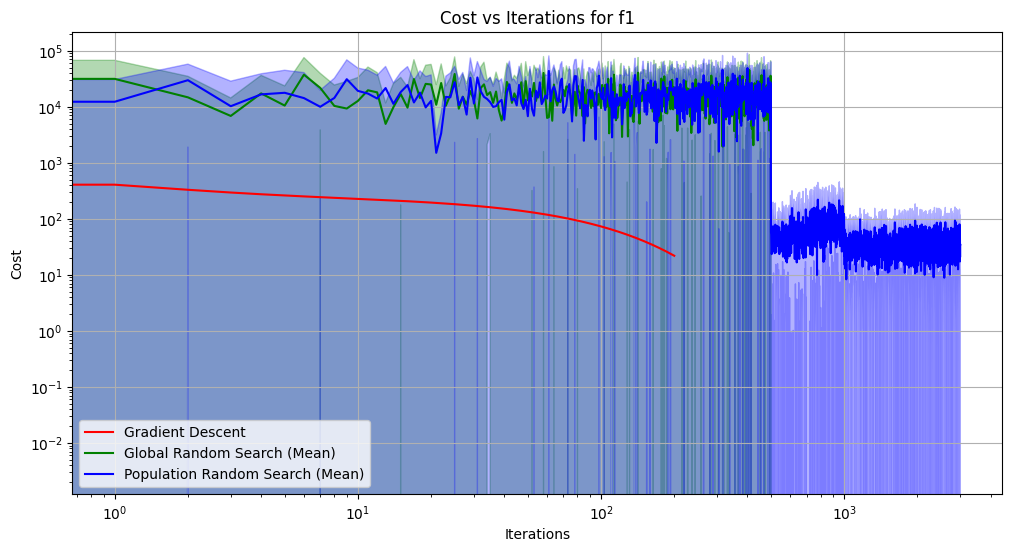

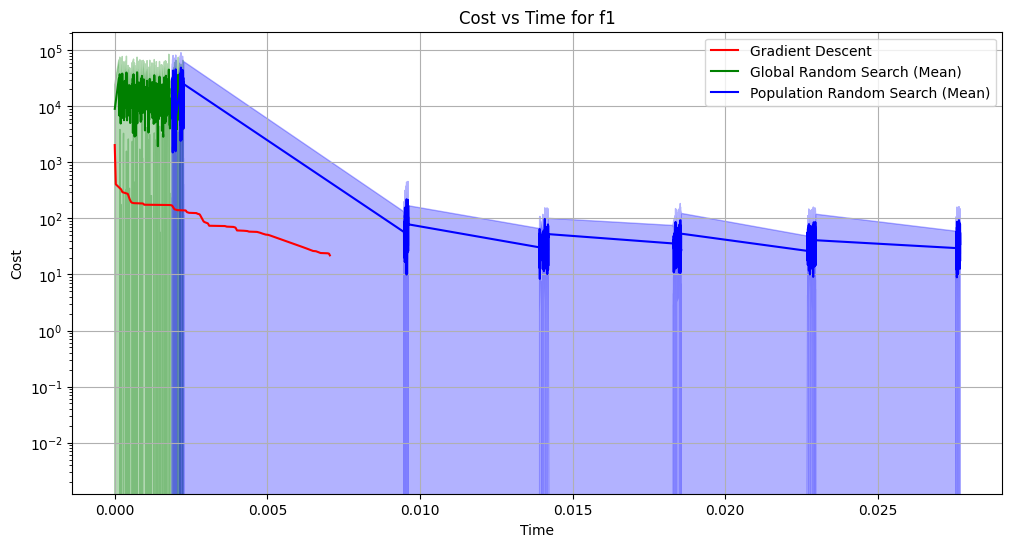


Plotting comparison for f2...


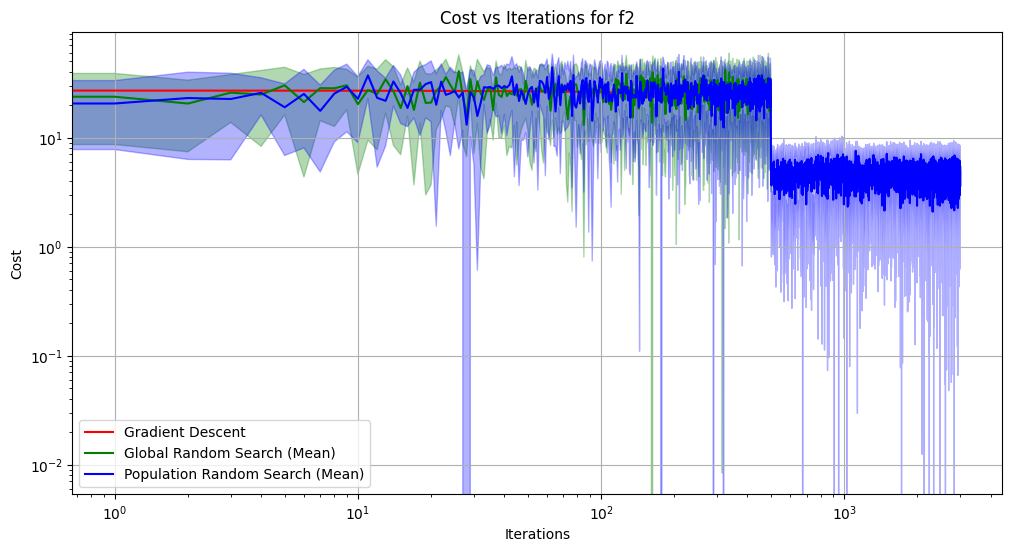

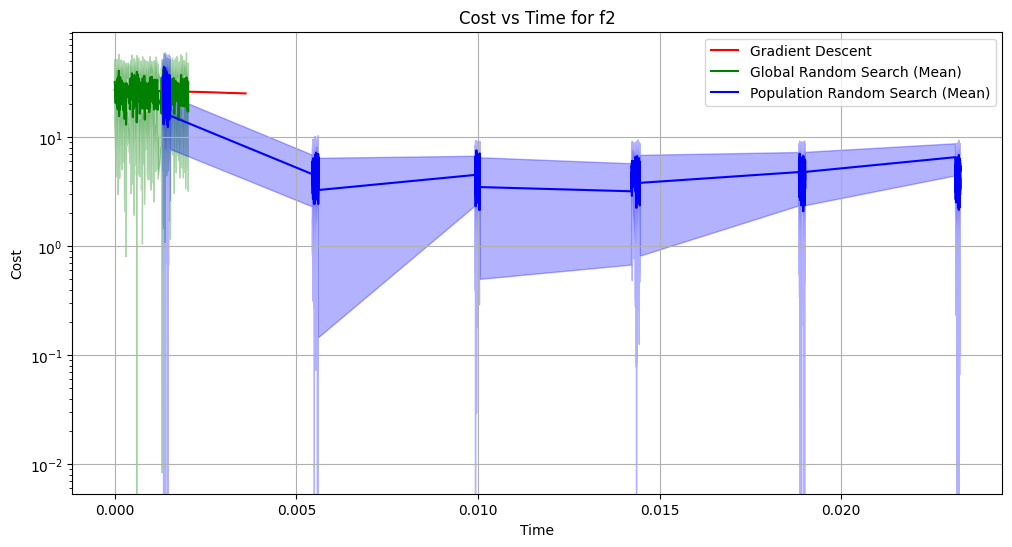


Best Parameters and Costs:

For f1 function:
Method                    Best Parameters                          Best Cost      
--------------------------------------------------------------------------------
Gradient Descent          [1.29457788 6.29903231]                  21.938390      
Global Random Search      [0.8220833 9.1107657]                    0.043821       
Population Random Search  [0.99930465 9.00464679]                  0.000065       

For f2 function:
Method                    Best Parameters                          Best Cost      
--------------------------------------------------------------------------------
Gradient Descent          [0.  0.6]                                25.200000      
Global Random Search      [-1.20041264  9.00217585]                0.006528       
Population Random Search  [-0.05814706  9.00003688]                0.000111       


In [9]:
bounds, gd_history_f1_tracked, grs_histories_f1, prs_histories_f1, gd_history_f2_tracked, grs_histories_f2, prs_histories_f2 = run_comparison()

---
### Contour Plots with Search Paths

The following cells create contour plots of the functions ($f_1$) and ($f_2$) with the
parameter updates overlaid. This helps us visualize how each algorithm explores the space.


In [12]:
def plot_contour_with_best_trajectories(cost_func, gd_history, grs_histories, prs_histories, func_name, bounds):
    x_min, x_max = bounds[0]
    y_min, y_max = bounds[1]

    # Create mesh grid
    x_vals = np.linspace(x_min, x_max, 400)
    y_vals = np.linspace(y_min, y_max, 400)
    X, Y = np.meshgrid(x_vals, y_vals)

    # Evaluate cost function on the grid
    Z = np.array([[cost_func([x, y]) for x in x_vals] for y in y_vals])

    # Plot contours
    plt.figure(figsize=(10, 8))
    contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar(label='Cost')

    # Plot GD path
    gd_points = np.array([x for _, _, x, _ in gd_history])
    plt.plot(gd_points[:, 0], gd_points[:, 1], 'r-', marker='o', markersize=4, label='Gradient Descent')

    # Find best GRS run (run with lowest final cost)
    grs_best_costs = [min(history, key=lambda x: x[1])[1] for history in grs_histories]
    best_grs_idx = np.argmin(grs_best_costs)
    best_grs_history = grs_histories[best_grs_idx]

    # Plot best GRS run
    grs_points = np.array([x for _, _, x, _ in best_grs_history])
    plt.scatter(grs_points[:, 0], grs_points[:, 1], c='lime', s=15, alpha=0.5, label='Global RS (Best Run)')

    # Find best PRS run (run with lowest final cost)
    prs_best_costs = [min(history, key=lambda x: x[1])[1] for history in prs_histories]
    best_prs_idx = np.argmin(prs_best_costs)
    best_prs_history = prs_histories[best_prs_idx]

    # Plot best PRS run
    prs_points = np.array([x for _, _, x, _ in best_prs_history])
    plt.scatter(prs_points[:, 0], prs_points[:, 1], c='blue', s=15, alpha=0.5, label='Population RS (Best Run)')

    # Highlight the best points found by each method
    best_gd_point = min(gd_history, key=lambda x: x[1])[2]
    best_grs_point = min(best_grs_history, key=lambda x: x[1])[2]
    best_prs_point = min(best_prs_history, key=lambda x: x[1])[2]

    plt.scatter(best_gd_point[0], best_gd_point[1], c='red', s=100, marker='*',
                edgecolor='black', linewidth=1.5, label='GD Best Point')
    plt.scatter(best_grs_point[0], best_grs_point[1], c='lime', s=100, marker='*',
                edgecolor='black', linewidth=1.5, label='GRS Best Point')
    plt.scatter(best_prs_point[0], best_prs_point[1], c='blue', s=100, marker='*',
                edgecolor='black', linewidth=1.5, label='PRS Best Point')

    plt.title(f'Contour Plot with Optimization Paths ({func_name})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

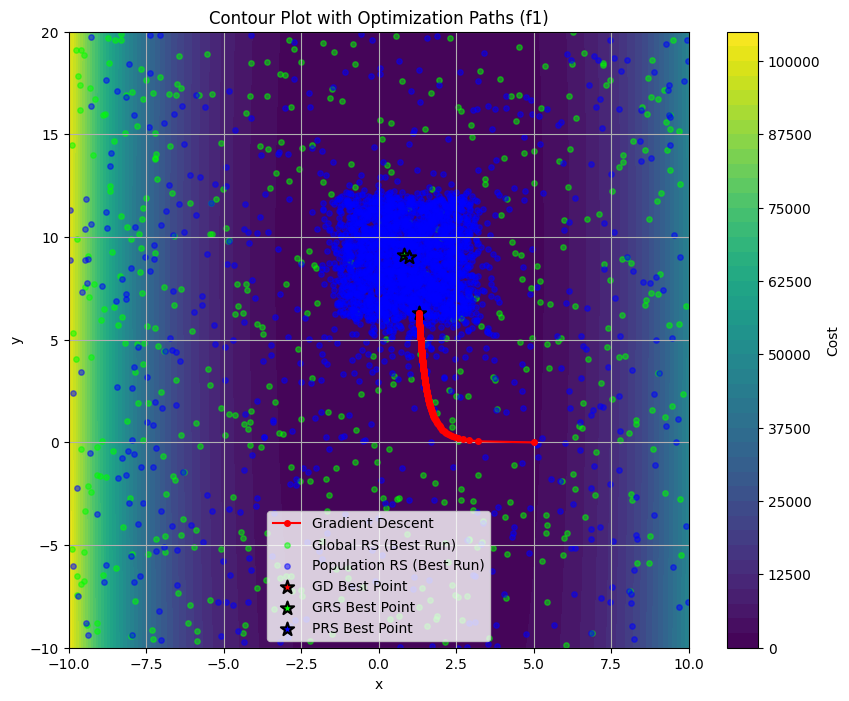

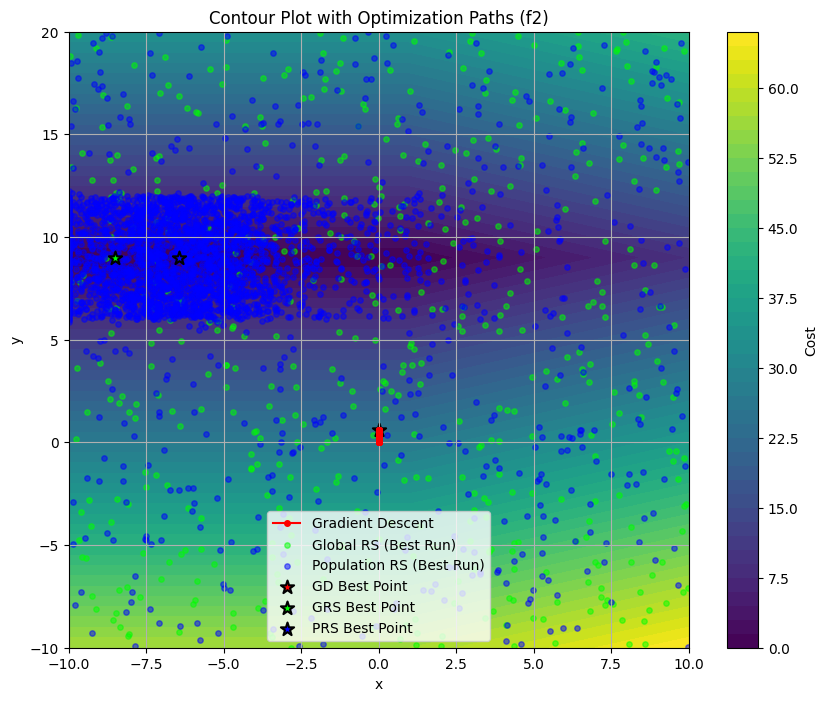

In [13]:
plot_contour_with_best_trajectories(f1_func, gd_history_f1_tracked, grs_histories_f1, prs_histories_f1, 'f1', bounds = [(-10, 10), (-10, 20)])
plot_contour_with_best_trajectories(f2_func, gd_history_f2_tracked, grs_histories_f2, prs_histories_f2, 'f2', bounds = [(-10, 10), (-10, 20)])

---
## (a)(ii) Random Search on Two Functions
 
### Functions, Theoretical Optima, and Implementation Strategy
 
#### **Functions and Theoretical Optima**
- **$ f_1(x) = 7(x-1)^4 + 3(y-9)^2 $**  
  *Optimum:* $(1,9)$ with a cost of 0.
- **$ f_2(x) = \max(x-1, 0) + 3\,|y-9|$**  
  *Optimum:* Achieved for $x \leq 1$ and $y = 9$ (cost of 0).

#### **Algorithm (Global Random Search)**
1. **Input:**  
  - Cost function $f$  
  - Number of parameters $n$  
  - Bounds $[l_i, u_i]$ for each parameter  
  - Number of samples $N$
2. **For** each iteration from 1 to $N$:
  - **Generate** a candidate vector by sampling each parameter uniformly from $[l_i, u_i]$.
  - **Evaluate** the cost function at this candidate.
  - **Update** the best candidate if the current cost is lower than the best observed.
3. **Output:**  
  - The best parameter vector, its corresponding cost, and a history log (iteration, cost, candidate, time).
 
This stochastic approach does not use gradient information and is repeated multiple times to assess variability.

#### **Performance Comparison with Gradient Descent (GD)**
- **GD** uses analytical or subgradients to update parameters iteratively. It requires both function and gradient evaluations each iteration, making it efficient on smooth functions such as $f_1$, but potentially less robust for non-smooth functions like $f_2$.
- **Function Evaluations:**  
  - GD makes one function and one gradient evaluation per iteration.
  - GRS makes one function evaluation per iteration but may require many more iterations (and multiple runs) to reliably find the optimum.
- **Measurement Issues:**  
  Timing results can vary due to system overhead and Python interpreter variability, meaning that cost versus time plots provide an approximate comparison.

### **Cost vs. Time and Cost vs. Iterations Plots**

#### **Description of the Plots**
- **Cost vs. Iterations:**  
  - **Gradient Descent (GD):**  
    The plot shows a steep initial decline in cost as GD rapidly descends along the gradient. However, its progress may plateau if the gradient becomes very small or if it gets trapped in a local minimum.
  - **Global Random Search (GRS):**  
    The points are more scattered, reflecting the random nature of the search. Although the average cost (mean over multiple runs) is higher, some runs can achieve near-optimal values. The variability (error bands representing standard deviation) is notable.
- **Cost vs. Time:**  
  - These plots reveal how quickly each method reduces the cost when considering elapsed time. GD tends to show rapid cost reduction early on, but the time per iteration includes gradient computation overhead.
  - GRS and the population-based methods may show slower average progress per unit time. Yet, their stochastic exploration can occasionally find superior solutions.
 
#### **Observations on Final Parameter Values and Evaluations**
- **For $ f_1 $:**  
  - GD may converge to a solution such as $[1.29, 6.30]$ with a relatively high cost (~21.94).  
  - GRS might yield parameters like $[0.82, 9.11]$ with a cost of ~0.04, while PRS can further refine to nearly exact values (e.g., $[0.999, 9.005]$) with an almost zero cost.
- **For $ f_2 $:**  
  - GD often converges to suboptimal values (e.g., $[0.0, 0.6]$) and a high cost (~25.20) due to its reliance on gradients in a non-smooth region.
  - Both GRS and PRS typically identify solutions with $x < 1$ and $y \approx 9$ (e.g., GRS: $[-1.20, 9.00]$ and PRS: $[-0.06, 9.00]$), leading to costs near 0.
- **Function/Gradient Evaluations:**  
  - Although the random search methods require many more function evaluations (and PRS even more due to its population approach), they often have no gradient overhead.  
  - In contrast, GD incurs both function and gradient evaluations per iteration, which may be efficient for smooth functions but becomes a limitation for non-smooth cases.
 
### **Key Insight on Averages vs. Optimality**
Even though the average cost over multiple runs for GRS and PRS remains higher than the lowest cost obtained by a single GD run, the inherent randomness means that some runs find near-optimal solutions. This variability highlights the exploration capability of random search methods; while many runs yield suboptimal costs, a few fortunate runs achieve values very close to the theoretical optimum.

---

## (b)(ii) Population-Based Random Search and Contour Plot Analysis
 
### **Algorithm (Population Random Search)**
1. **Input:**  
  - Cost function $f$, number of parameters $n$, bounds, number of samples $N$ per generation, best candidates to keep $M$, and number of generations.
2. **Initialization:**  
  - Generate an initial population of $N$ random candidate vectors.
3. **For each generation:**
  - **Evaluate** the cost of each candidate.
  - **Select** the best $M$ candidates.
  - **Generate** a new set of candidates by perturbing the selected $M$ candidates, ensuring that the new candidates remain within the bounds.
  - **Record** the history (iteration, cost, candidate, time).
4. **Output:**  
  - The best candidate found, its cost, and the complete history.
 
This algorithm enhances pure random search by concentrating on promising regions, thereby balancing exploration and exploitation.

### **Contour Plot Analysis and Description**
- **Contour Plots:**  
  - These plots represent the cost function landscape with contours indicating cost levels.
  - **GD Path:**  
    Depicted as a continuous, smooth trajectory following the gradient. This path is effective in smooth regions but may not handle non-smooth features well.
  - **GRS Trajectory:**  
    Shown as dispersed points across the landscape, reflecting random sampling. Despite high variability, some points are found near the optimal region.
  - **PRS Trajectory:**  
    Exhibits clusters of points that progressively concentrate near the optimum. This clustering shows how the algorithm refines its search over successive generations.
- **Best Points:**  
  The plots highlight the best parameter values identified by each method (e.g., stars or distinct markers). For $ f_1 $, the best points align closely with $(1,9)$; for $ f_2 $, they are near $(x \leq 1, 9)$.

### **Cost vs. Time and Iterations Analysis for PRS**
- **Cost vs. Time:**  
  PRS typically requires more computational time per run due to the evaluation of a larger number of candidates over multiple generations. However, its focused search often yields very low costs when near-optimal candidates are found.
- **Cost vs. Iterations:**  
  The cost reduction per iteration in PRS is gradual but more consistent in later generations as the population converges. Although the mean cost over multiple runs might remain higher than the best-case scenario in GD, the minimum cost observed across runs shows the algorithm’s potential to locate the optimum.
 
### **Comparative Summary**
- **GD:**  
  Efficient for smooth functions but may settle in non-optimal regions for non-smooth problems.
- **GRS:**  
  Offers robust exploration with many function evaluations; however, its average performance is variable due to its stochastic nature.
- **PRS:**  
  Refines the search by exploiting promising regions, achieving the lowest cost in some runs despite higher average costs. It incurs a greater evaluation cost but can eventually pinpoint near-optimal parameter values.
- **Evaluations:**  
  GD’s dual evaluations (function and gradient) can be computationally efficient for well-behaved functions but are less effective for non-smooth landscapes. In contrast, GRS and PRS use only function evaluations—albeit in larger numbers—which allows them to eventually overcome local minima through random exploration.
 
---
 
In summary, while the average cost across multiple runs of random search methods (GRS and PRS) may be higher than the best-case cost found by GD, their stochastic nature enables them to occasionally locate solutions very close to the theoretical optima. The detailed contour plots illustrate the distinct paths taken by each algorithm: GD follows a smooth descent, whereas GRS exhibits dispersed sampling and PRS shows progressive concentration near the optimal region. These plots, along with the comparisons of function and gradient evaluations, underscore the trade-offs between efficiency and robustness inherent in these optimization approaches.

---
## Section 5: Hyperparameter Tuning for the CNN via Random Search

In this final section we use the random search algorithms to choose hyperparameters for our CNN.

The hyperparameters we consider are:

- **Mini-batch size**
- **Adam parameters:** learning rate $\alpha$, $\beta_1$ , $\beta_2$.
- **Number of epochs:**

For each candidate hyperparameter vector, we train the model and evaluate its performance (using validation loss).


In [14]:
import os
import logging
import datetime

# Create logging directory if it doesn't exist
log_dir = "hyperparam_logs"
os.makedirs(log_dir, exist_ok=True)

# Set up loggers for each search method - one file per method
grs_logger = logging.getLogger('grs_logger')
grs_logger.setLevel(logging.INFO)
grs_handler = logging.FileHandler(f'{log_dir}/global_random_search.log')
grs_formatter = logging.Formatter('%(asctime)s - [Run:%(run_id)s] - %(message)s')
grs_handler.setFormatter(grs_formatter)
grs_logger.addHandler(grs_handler)

prs_logger = logging.getLogger('prs_logger')
prs_logger.setLevel(logging.INFO)
prs_handler = logging.FileHandler(f'{log_dir}/population_random_search.log')
prs_formatter = logging.Formatter('%(asctime)s - [Run:%(run_id)s] - %(message)s')
prs_handler.setFormatter(prs_formatter)
prs_logger.addHandler(prs_handler)

# Generate a unique run ID for this execution
run_id = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Create an adapter that adds the run_id to all log records
class RunAdapter(logging.LoggerAdapter):
    def process(self, msg, kwargs):
        if 'extra' not in kwargs:
            kwargs['extra'] = {}
        kwargs['extra']['run_id'] = self.extra['run_id']
        return msg, kwargs

# Create adapted loggers with run_id
grs_adapted_logger = RunAdapter(grs_logger, {'run_id': run_id})
prs_adapted_logger = RunAdapter(prs_logger, {'run_id': run_id})

In [15]:
# Wrap original global_random_search function to add logging
def global_random_search_with_logging(cost_func, n, bounds, N):
    """Global random search with logging"""
    grs_adapted_logger.info(f"Starting Global Random Search with N={N} samples")
    grs_adapted_logger.info(f"Parameter bounds: {bounds}")

    # Create a wrapper function that logs each evaluation
    def logged_cost_func(params):
        return cost_func(params, grs_adapted_logger)

    start_time = time.time()
    best_cost = np.inf
    best_x = None
    history = []

    for i in range(N):
        current_time = time.time() - start_time
        candidate = np.array([np.random.uniform(low, high) for (low, high) in bounds])
        grs_adapted_logger.info(f"Sample {i+1}/{N}: Testing candidate {candidate}")
        cost = logged_cost_func(candidate)
        history.append((i, cost, candidate.copy(), current_time))

        grs_adapted_logger.info(f"Sample {i+1}/{N}: Cost = {cost:.6f}, Time = {current_time:.2f}s")

        if cost < best_cost:
            best_cost = cost
            best_x = candidate
            grs_adapted_logger.info(f"Sample {i+1}/{N}: New best cost = {best_cost:.6f}")

    total_time = time.time() - start_time
    grs_adapted_logger.info(f"Global Random Search completed in {total_time:.2f}s")
    grs_adapted_logger.info(f"Best parameters: {best_x}")
    grs_adapted_logger.info(f"Best cost: {best_cost:.6f}")

    return best_x, best_cost, history

# Wrap original population_random_search function to add logging
def population_random_search_with_logging(cost_func, n, bounds, N, M, iterations):
    """Population-based random search with logging"""
    prs_adapted_logger.info(f"Starting Population Random Search with N={N}, M={M}, iterations={iterations}")
    prs_adapted_logger.info(f"Parameter bounds: {bounds}")

    # Create a wrapper function that logs each evaluation
    def logged_cost_func(params):
        return cost_func(params, prs_adapted_logger)

    start_time = time.time()
    # Initial random population
    prs_adapted_logger.info("Generating initial random population")
    population = [np.array([np.random.uniform(low, high) for (low, high) in bounds]) for _ in range(N)]
    population_costs = [logged_cost_func(x) for x in population]
    history = []
    iteration_count = 0

    # Record initial population
    for i, (point, cost) in enumerate(zip(population, population_costs)):
        current_time = time.time() - start_time
        history.append((iteration_count, cost, point.copy(), current_time))
        iteration_count += 1

    for it in range(iterations):
        prs_adapted_logger.info(f"Generation {it+1}/{iterations}: Sorting population")
        # Sort population based on cost (ascending order)
        sorted_idx = np.argsort(population_costs)
        population = [population[i] for i in sorted_idx]
        population_costs = [population_costs[i] for i in sorted_idx]

        # Keep best M candidates
        best_M = population[:M]
        prs_adapted_logger.info(f"Generation {it+1}/{iterations}: Best cost = {population_costs[0]:.6f}")

        # Generate new candidates in the neighbourhood of each best candidate
        prs_adapted_logger.info(f"Generation {it+1}/{iterations}: Generating new candidates")
        new_population = []
        for point_idx, point in enumerate(best_M):
            for j in range(N // M):
                candidate = np.array([
                    np.clip(point[i] + np.random.uniform(-0.1*(bounds[i][1]-bounds[i][0]),
                                                        0.1*(bounds[i][1]-bounds[i][0])),
                          bounds[i][0], bounds[i][1])
                    for i in range(n)
                ])
                new_population.append(candidate)

        population = new_population
        prs_adapted_logger.info(f"Generation {it+1}/{iterations}: Evaluating new population")
        population_costs = [logged_cost_func(x) for x in population]

        # Record new population
        for point, cost in zip(population, population_costs):
            current_time = time.time() - start_time
            history.append((iteration_count, cost, point.copy(), current_time))
            iteration_count += 1

    # Return the best candidate from the final population
    best_idx = np.argmin(population_costs)
    best_x = population[best_idx]
    best_cost = population_costs[best_idx]

    total_time = time.time() - start_time
    prs_adapted_logger.info(f"Population Random Search completed in {total_time:.2f}s")
    prs_adapted_logger.info(f"Best parameters: {best_x}")
    prs_adapted_logger.info(f"Best cost: {best_cost:.6f}")

    return best_x, best_cost, history

In [16]:
def evaluate_model_hyperparams(hyperparams, logger=None):
    """Cost function for hyperparameter optimization with logging"""
    batch_size = int(hyperparams[0])
    learning_rate = hyperparams[1]
    beta_1 = hyperparams[2]
    beta_2 = hyperparams[3]
    epochs = int(hyperparams[4])

    if logger:
        logger.info(f"Evaluating hyperparams: batch_size={batch_size}, lr={learning_rate:.6f}, "
                    f"beta1={beta_1:.6f}, beta2={beta_2:.6f}, epochs={epochs}")

    # Build model with same architecture
    model = keras.Sequential([
        layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=input_shape),
        layers.Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'),
        layers.Conv2D(32, (3,3), padding='same', activation='relu'),
        layers.Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'),
        layers.Dropout(0.5),
        layers.Flatten(),
        layers.Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l1(0.0001))
    ])

    # Compile with custom optimizer parameters
    optimizer = keras.optimizers.Adam(
        learning_rate=learning_rate,
        beta_1=beta_1,
        beta_2=beta_2
    )

    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    # Train model with early stopping to prevent overfitting
    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )

    # Custom callback for logging
    class LoggingCallback(keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            if logger and epoch % 5 == 0:  # Log every 5 epochs to avoid excessive logs
                logger.info(f"  Epoch {epoch+1}/{epochs}: loss={logs['loss']:.4f}, "
                           f"val_loss={logs['val_loss']:.4f}, "
                           f"accuracy={logs['accuracy']:.4f}, "
                           f"val_accuracy={logs['val_accuracy']:.4f}")

    # Train with validation split
    history = model.fit(
        x_train, y_train_cat,
        batch_size=batch_size,
        epochs=epochs,
        validation_split=0.2,
        callbacks=[early_stopping, LoggingCallback()] if logger else [early_stopping],
        verbose=0  # Silent training
    )

    # Get validation loss as our cost to minimize
    val_loss = min(history.history['val_loss'])
    val_acc = max(history.history['val_accuracy'])

    if logger:
        logger.info(f"  Result: val_loss={val_loss:.4f}, val_accuracy={val_acc:.4f}, "
                   f"stopped at epoch {len(history.history['loss'])}/{epochs}")

    # Clear session to release memory
    tf.keras.backend.clear_session()

    return val_loss

In [17]:
# Define parameter bounds
n_params = 5
bounds = [
    (16, 256),       # batch_size (will be converted to int)
    (0.0001, 0.01),  # learning_rate
    (0.8, 0.99),     # beta_1
    (0.9, 0.9999),   # beta_2
    (5, 30)          # epochs (will be converted to int)
]

# Run global random search
N_samples = 20  # Adjust based on your computational resources
print("Running Global Random Search for hyperparameter optimization...")
best_hyperparams_grs, best_loss_grs, history_grs = global_random_search_with_logging(
    evaluate_model_hyperparams, n_params, bounds, N_samples
)

# Run population-based random search
M_best = 3  # Keep best 3 candidates
pop_iterations = 3  # Run for 3 generations
print("Running Population-based Random Search for hyperparameter optimization...")
best_hyperparams_prs, best_loss_prs, history_prs = population_random_search_with_logging(
    evaluate_model_hyperparams, n_params, bounds, N_samples, M_best, pop_iterations
)

# Print results and also log them
result_log = f"""
Hyperparameter Optimization Results:

Global Random Search:
Best Loss: {best_loss_grs:.4f}
Best Hyperparameters:
  Batch Size: {int(best_hyperparams_grs[0])}
  Learning Rate: {best_hyperparams_grs[1]:.6f}
  Beta 1: {best_hyperparams_grs[2]:.6f}
  Beta 2: {best_hyperparams_grs[3]:.6f}
  Epochs: {int(best_hyperparams_grs[4])}

Population Random Search:
Best Loss: {best_loss_prs:.4f}
Best Hyperparameters:
  Batch Size: {int(best_hyperparams_prs[0])}
  Learning Rate: {best_hyperparams_prs[1]:.6f}
  Beta 1: {best_hyperparams_prs[2]:.6f}
  Beta 2: {best_hyperparams_prs[3]:.6f}
  Epochs: {int(best_hyperparams_prs[4])}
"""

print(result_log)
grs_adapted_logger.info(result_log)
prs_adapted_logger.info(result_log)


INFO:grs_logger:Starting Global Random Search with N=20 samples
INFO:grs_logger:Parameter bounds: [(16, 256), (0.0001, 0.01), (0.8, 0.99), (0.9, 0.9999), (5, 30)]
INFO:grs_logger:Sample 1/20: Testing candidate [4.67967691e+01 7.76975684e-03 9.17004362e-01 9.64679557e-01
 1.11431716e+01]
INFO:grs_logger:Evaluating hyperparams: batch_size=46, lr=0.007770, beta1=0.917004, beta2=0.964680, epochs=11


Running Global Random Search for hyperparameter optimization...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
INFO:grs_logger:  Epoch 1/11: loss=2.2079, val_loss=2.1438, accuracy=0.1968, val_accuracy=0.2050
INFO:grs_logger:  Epoch 6/11: loss=1.8200, val_loss=1.7999, accuracy=0.3643, val_accuracy=0.3710
INFO:grs_logger:  Epoch 11/11: loss=1.6514, val_loss=1.7769, accuracy=0.4302, val_accuracy=0.4000
INFO:grs_logger:  Result: val_loss=1.7176, val_accuracy=0.4160, stopped at epoch 11/11
INFO:grs_logger:Sample 1/20: Cost = 1.717565, Time = 0.00s
INFO:grs_logger:Sample 1/20: New best cost = 1.717565
INFO:grs_logger:Sample 2/20: Testing candidate [1.62070862e+02 7.51453226e-03 8.58987898e-01 9.94603682e-01
 1.44093284e+01]
INFO:grs_logger:Evaluating hyperparams

Running Population-based Random Search for hyperparameter optimization...


INFO:prs_logger:  Epoch 1/11: loss=2.2334, val_loss=2.0031, accuracy=0.1790, val_accuracy=0.2930
INFO:prs_logger:  Epoch 6/11: loss=1.6402, val_loss=1.6826, accuracy=0.4333, val_accuracy=0.4150
INFO:prs_logger:  Epoch 11/11: loss=1.3960, val_loss=1.6286, accuracy=0.5320, val_accuracy=0.4570
INFO:prs_logger:  Result: val_loss=1.6286, val_accuracy=0.4570, stopped at epoch 11/11
INFO:prs_logger:Evaluating hyperparams: batch_size=51, lr=0.003750, beta1=0.849936, beta2=0.935334, epochs=6
INFO:prs_logger:  Epoch 1/6: loss=2.1497, val_loss=1.9772, accuracy=0.2062, val_accuracy=0.2950
INFO:prs_logger:  Epoch 6/6: loss=1.5429, val_loss=1.6122, accuracy=0.4667, val_accuracy=0.4660
INFO:prs_logger:  Result: val_loss=1.6122, val_accuracy=0.4660, stopped at epoch 6/6
INFO:prs_logger:Evaluating hyperparams: batch_size=124, lr=0.006709, beta1=0.866098, beta2=0.968300, epochs=21
INFO:prs_logger:  Epoch 1/21: loss=2.2213, val_loss=2.1347, accuracy=0.1970, val_accuracy=0.2150
INFO:prs_logger:  Epoch 6/2


Hyperparameter Optimization Results:

Global Random Search:
Best Loss: 1.5159
Best Hyperparameters:
  Batch Size: 191
  Learning Rate: 0.001625
  Beta 1: 0.868706
  Beta 2: 0.977476
  Epochs: 13

Population Random Search:
Best Loss: 1.4596
Best Hyperparameters:
  Batch Size: 173
  Learning Rate: 0.001581
  Beta 1: 0.877051
  Beta 2: 0.945393
  Epochs: 27




Comparison between Global Random Search and Population Random Search:
Metric                         Global RS       Population RS   Difference (PRS-GRS)
--------------------------------------------------------------------------------
Best validation loss           1.515856        1.459570        -0.056286           
Total evaluations              20              74              54                  
Total search time (s)          235.50          913.53          678.03              
Avg evaluation time (s)        11.78           12.35           0.57                

Convergence comparison:
Evaluations     GRS best loss   PRS best loss   Difference     
------------------------------------------------------------
5               1.577350        1.612202        0.034852       
10              1.546204        1.490966        -0.055238      
20              1.515856        1.487575        -0.028281      
20              1.515856        1.487575        -0.028281      


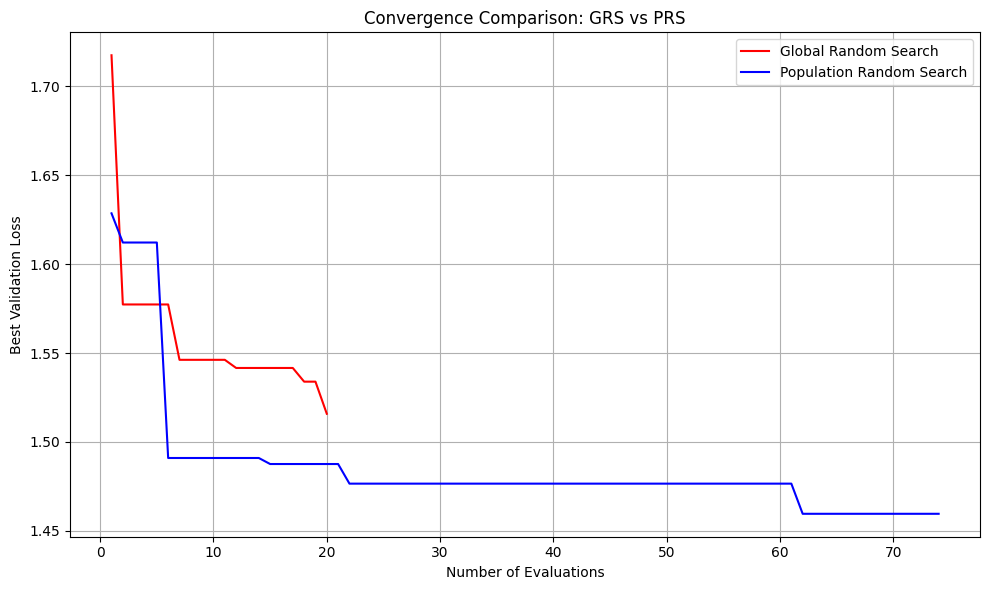

In [18]:

# Compare metrics between methods
print("\nComparison between Global Random Search and Population Random Search:")
print(f"{'Metric':<30} {'Global RS':<15} {'Population RS':<15} {'Difference (PRS-GRS)':<20}")
print("-" * 80)

# Compare final validation loss
print(f"{'Best validation loss':<30} {best_loss_grs:<15.6f} {best_loss_prs:<15.6f} {best_loss_prs-best_loss_grs:<20.6f}")

# Compare number of function evaluations
grs_evals = len(history_grs)
prs_evals = len(history_prs)
print(f"{'Total evaluations':<30} {grs_evals:<15d} {prs_evals:<15d} {prs_evals-grs_evals:<20d}")

# Compare time efficiency
grs_time = history_grs[-1][3]  # Last time entry
prs_time = history_prs[-1][3]  # Last time entry
print(f"{'Total search time (s)':<30} {grs_time:<15.2f} {prs_time:<15.2f} {prs_time-grs_time:<20.2f}")

# Compare average evaluation time
grs_avg_time = grs_time / grs_evals
prs_avg_time = prs_time / prs_evals
print(f"{'Avg evaluation time (s)':<30} {grs_avg_time:<15.2f} {prs_avg_time:<15.2f} {prs_avg_time-grs_avg_time:<20.2f}")

# Calculate and compare convergence rate
# (how quickly each method finds a good solution)
def get_best_loss_at_evals(history, eval_points):
    """Get best loss found after n evaluations"""
    results = []
    for n in eval_points:
        if n > len(history):
            results.append(np.nan)
        else:
            best_at_n = min([h[1] for h in history[:n]])
            results.append(best_at_n)
    return results

# Check best loss at different evaluation points
eval_checkpoints = [5, 10, 20, 50, 100, min(len(history_grs), len(history_prs))]
eval_checkpoints = [n for n in eval_checkpoints if n <= min(len(history_grs), len(history_prs))]

grs_convergence = get_best_loss_at_evals(history_grs, eval_checkpoints)
prs_convergence = get_best_loss_at_evals(history_prs, eval_checkpoints)

print("\nConvergence comparison:")
print(f"{'Evaluations':<15} {'GRS best loss':<15} {'PRS best loss':<15} {'Difference':<15}")
print("-" * 60)
for i, n in enumerate(eval_checkpoints):
    print(f"{n:<15d} {grs_convergence[i]:<15.6f} {prs_convergence[i]:<15.6f} {prs_convergence[i]-grs_convergence[i]:<15.6f}")

# Visualization of convergence
plt.figure(figsize=(10, 6))
grs_min_losses = np.minimum.accumulate([h[1] for h in history_grs])
prs_min_losses = np.minimum.accumulate([h[1] for h in history_prs])

plt.plot(range(1, len(grs_min_losses)+1), grs_min_losses, 'r-', label='Global Random Search')
plt.plot(range(1, len(prs_min_losses)+1), prs_min_losses, 'b-', label='Population Random Search')
plt.xlabel('Number of Evaluations')
plt.ylabel('Best Validation Loss')
plt.title('Convergence Comparison: GRS vs PRS')
plt.legend()
plt.grid(True)
plt.tight_layout()

convergence_plot_path = f"{log_dir}/convergence_comparison_{run_id}.png"
plt.savefig(convergence_plot_path)
plt.show()

# Log the comparison
with open(f"{log_dir}/method_comparison_{run_id}.txt", "w") as f:
    f.write("Comparison between Global Random Search and Population Random Search:\n\n")
    f.write(f"{'Metric':<30} {'Global RS':<15} {'Population RS':<15} {'Difference (PRS-GRS)':<20}\n")
    f.write("-" * 80 + "\n")
    f.write(f"{'Best validation loss':<30} {best_loss_grs:<15.6f} {best_loss_prs:<15.6f} {best_loss_prs-best_loss_grs:<20.6f}\n")
    f.write(f"{'Total evaluations':<30} {grs_evals:<15d} {prs_evals:<15d} {prs_evals-grs_evals:<20d}\n")
    f.write(f"{'Total search time (s)':<30} {grs_time:<15.2f} {prs_time:<15.2f} {prs_time-grs_time:<20.2f}\n")
    f.write(f"{'Avg evaluation time (s)':<30} {grs_avg_time:<15.2f} {prs_avg_time:<15.2f} {prs_avg_time-grs_avg_time:<20.2f}\n\n")

    f.write("Convergence comparison:\n")
    f.write(f"{'Evaluations':<15} {'GRS best loss':<15} {'PRS best loss':<15} {'Difference':<15}\n")
    f.write("-" * 60 + "\n")
    for i, n in enumerate(eval_checkpoints):
        f.write(f"{n:<15d} {grs_convergence[i]:<15.6f} {prs_convergence[i]:<15.6f} {prs_convergence[i]-grs_convergence[i]:<15.6f}\n")


INFO:final_model:Training final model with best hyperparameters:
INFO:final_model:Batch Size: 173
INFO:final_model:Learning Rate: 0.001581
INFO:final_model:Beta 1: 0.877051
INFO:final_model:Beta 2: 0.945393
INFO:final_model:Epochs: 27



Training final model with best hyperparameters...
Epoch 1/27
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.1373 - loss: 2.3217

INFO:final_model:Epoch 1/27: loss=2.2604, val_loss=2.0628, accuracy=0.1649, val_accuracy=0.2700


27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - accuracy: 0.1382 - loss: 2.3195 - val_accuracy: 0.2700 - val_loss: 2.0628
Epoch 2/27
17/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2643 - loss: 2.0874 

INFO:final_model:Epoch 2/27: loss=1.9858, val_loss=1.9203, accuracy=0.2893, val_accuracy=0.3180


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2727 - loss: 2.0534 - val_accuracy: 0.3180 - val_loss: 1.9203
Epoch 3/27
17/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3184 - loss: 1.9334 

INFO:final_model:Epoch 3/27: loss=1.8509, val_loss=1.7924, accuracy=0.3447, val_accuracy=0.3900


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3278 - loss: 1.9064 - val_accuracy: 0.3900 - val_loss: 1.7924
Epoch 4/27
17/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3750 - loss: 1.8135 

INFO:final_model:Epoch 4/27: loss=1.7793, val_loss=1.7626, accuracy=0.3820, val_accuracy=0.3980


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3772 - loss: 1.8037 - val_accuracy: 0.3980 - val_loss: 1.7626
Epoch 5/27
17/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3963 - loss: 1.7552 

INFO:final_model:Epoch 5/27: loss=1.7147, val_loss=1.7678, accuracy=0.4111, val_accuracy=0.4220


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4009 - loss: 1.7433 - val_accuracy: 0.4220 - val_loss: 1.7678
Epoch 6/27
16/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4159 - loss: 1.7390 

INFO:final_model:Epoch 6/27: loss=1.6720, val_loss=1.6725, accuracy=0.4258, val_accuracy=0.4380


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4198 - loss: 1.7142 - val_accuracy: 0.4380 - val_loss: 1.6725
Epoch 7/27
17/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4428 - loss: 1.6501 

INFO:final_model:Epoch 7/27: loss=1.6194, val_loss=1.6256, accuracy=0.4396, val_accuracy=0.4360


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4417 - loss: 1.6400 - val_accuracy: 0.4360 - val_loss: 1.6256
Epoch 8/27
16/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4546 - loss: 1.5883 

INFO:final_model:Epoch 8/27: loss=1.5748, val_loss=1.5898, accuracy=0.4571, val_accuracy=0.4700


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4561 - loss: 1.5836 - val_accuracy: 0.4700 - val_loss: 1.5898
Epoch 9/27
17/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4651 - loss: 1.5281 

INFO:final_model:Epoch 9/27: loss=1.5187, val_loss=1.5818, accuracy=0.4709, val_accuracy=0.4740


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4669 - loss: 1.5256 - val_accuracy: 0.4740 - val_loss: 1.5818
Epoch 10/27
16/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4798 - loss: 1.4978 

INFO:final_model:Epoch 10/27: loss=1.4801, val_loss=1.5457, accuracy=0.4858, val_accuracy=0.4820


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4827 - loss: 1.4912 - val_accuracy: 0.4820 - val_loss: 1.5457
Epoch 11/27
17/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4977 - loss: 1.4534 

INFO:final_model:Epoch 11/27: loss=1.4456, val_loss=1.5903, accuracy=0.4998, val_accuracy=0.4700


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4984 - loss: 1.4522 - val_accuracy: 0.4700 - val_loss: 1.5903
Epoch 12/27
17/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4988 - loss: 1.4548 

INFO:final_model:Epoch 12/27: loss=1.4330, val_loss=1.5305, accuracy=0.5069, val_accuracy=0.4820


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5011 - loss: 1.4489 - val_accuracy: 0.4820 - val_loss: 1.5305
Epoch 13/27
17/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5241 - loss: 1.4012 

INFO:final_model:Epoch 13/27: loss=1.3816, val_loss=1.5213, accuracy=0.5231, val_accuracy=0.5000


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5252 - loss: 1.3938 - val_accuracy: 0.5000 - val_loss: 1.5213
Epoch 14/27
17/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5282 - loss: 1.3716 

INFO:final_model:Epoch 14/27: loss=1.3661, val_loss=1.5779, accuracy=0.5296, val_accuracy=0.4720


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5281 - loss: 1.3716 - val_accuracy: 0.4720 - val_loss: 1.5779
Epoch 15/27
17/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5376 - loss: 1.3554 

INFO:final_model:Epoch 15/27: loss=1.3506, val_loss=1.4712, accuracy=0.5453, val_accuracy=0.5160


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5398 - loss: 1.3552 - val_accuracy: 0.5160 - val_loss: 1.4712
Epoch 16/27
17/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5531 - loss: 1.3027 

INFO:final_model:Epoch 16/27: loss=1.3127, val_loss=1.4921, accuracy=0.5560, val_accuracy=0.5020


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5533 - loss: 1.3073 - val_accuracy: 0.5020 - val_loss: 1.4921
Epoch 17/27
16/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5622 - loss: 1.2862 

INFO:final_model:Epoch 17/27: loss=1.3077, val_loss=1.4980, accuracy=0.5551, val_accuracy=0.4920


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5591 - loss: 1.2942 - val_accuracy: 0.4920 - val_loss: 1.4980
Epoch 18/27
17/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5790 - loss: 1.2735 

INFO:final_model:Epoch 18/27: loss=1.2810, val_loss=1.4960, accuracy=0.5707, val_accuracy=0.4900


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5761 - loss: 1.2770 - val_accuracy: 0.4900 - val_loss: 1.4960
Epoch 19/27
16/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5776 - loss: 1.2514 

INFO:final_model:Epoch 19/27: loss=1.2544, val_loss=1.4692, accuracy=0.5753, val_accuracy=0.5140


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5763 - loss: 1.2533 - val_accuracy: 0.5140 - val_loss: 1.4692
Epoch 20/27
16/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5820 - loss: 1.2219 

INFO:final_model:Epoch 20/27: loss=1.2340, val_loss=1.5449, accuracy=0.5782, val_accuracy=0.4800


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5820 - loss: 1.2250 - val_accuracy: 0.4800 - val_loss: 1.5449
Epoch 21/27
16/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5811 - loss: 1.2419 

INFO:final_model:Epoch 21/27: loss=1.2277, val_loss=1.5287, accuracy=0.5827, val_accuracy=0.5020


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5818 - loss: 1.2370 - val_accuracy: 0.5020 - val_loss: 1.5287
Epoch 22/27
17/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5907 - loss: 1.2203 

INFO:final_model:Epoch 22/27: loss=1.2181, val_loss=1.5222, accuracy=0.5889, val_accuracy=0.4980


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5899 - loss: 1.2201 - val_accuracy: 0.4980 - val_loss: 1.5222
Epoch 23/27
16/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5888 - loss: 1.2056 

INFO:final_model:Epoch 23/27: loss=1.2025, val_loss=1.6244, accuracy=0.5929, val_accuracy=0.4880


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5901 - loss: 1.2052 - val_accuracy: 0.4880 - val_loss: 1.6244
Epoch 24/27
16/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5648 - loss: 1.2387 

INFO:final_model:Epoch 24/27: loss=1.2048, val_loss=1.4947, accuracy=0.5849, val_accuracy=0.5100


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5717 - loss: 1.2286 - val_accuracy: 0.5100 - val_loss: 1.4947
Epoch 25/27
16/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5999 - loss: 1.1984 

INFO:final_model:Epoch 25/27: loss=1.1799, val_loss=1.4897, accuracy=0.6093, val_accuracy=0.5020


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6033 - loss: 1.1927 - val_accuracy: 0.5020 - val_loss: 1.4897
Epoch 26/27
16/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5986 - loss: 1.1576 

INFO:final_model:Epoch 26/27: loss=1.1509, val_loss=1.4726, accuracy=0.6089, val_accuracy=0.5040


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6025 - loss: 1.1556 - val_accuracy: 0.5040 - val_loss: 1.4726
Epoch 27/27
16/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6097 - loss: 1.1544 

INFO:final_model:Epoch 27/27: loss=1.1434, val_loss=1.5272, accuracy=0.6164, val_accuracy=0.4960


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6126 - loss: 1.1510 - val_accuracy: 0.4960 - val_loss: 1.5272


INFO:final_model:Model saved to hyperparam_logs/best_model_20250403_185351.keras


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


INFO:final_model:Classification Report (Test):
              precision    recall  f1-score   support

           0       0.60      0.48      0.53      1000
           1       0.71      0.61      0.65      1000
           2       0.44      0.38      0.40      1000
           3       0.28      0.54      0.37      1000
           4       0.44      0.33      0.38      1000
           5       0.39      0.37      0.38      1000
           6       0.60      0.45      0.52      1000
           7       0.55      0.58      0.56      1000
           8       0.59      0.59      0.59      1000
           9       0.55      0.57      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.51      0.49      0.49     10000
weighted avg       0.51      0.49      0.49     10000



Classification Report (Test):
              precision    recall  f1-score   support

           0       0.60      0.48      0.53      1000
           1       0.71      0.61      0.65      1000
           2       0.44      0.38      0.40      1000
           3       0.28      0.54      0.37      1000
           4       0.44      0.33      0.38      1000
           5       0.39      0.37      0.38      1000
           6       0.60      0.45      0.52      1000
           7       0.55      0.58      0.56      1000
           8       0.59      0.59      0.59      1000
           9       0.55      0.57      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.51      0.49      0.49     10000
weighted avg       0.51      0.49      0.49     10000



INFO:final_model:Final test loss: 1.4904
INFO:final_model:Final test accuracy: 0.4891
INFO:final_model:Training history plot saved to hyperparam_logs/training_history_20250403_185351.png


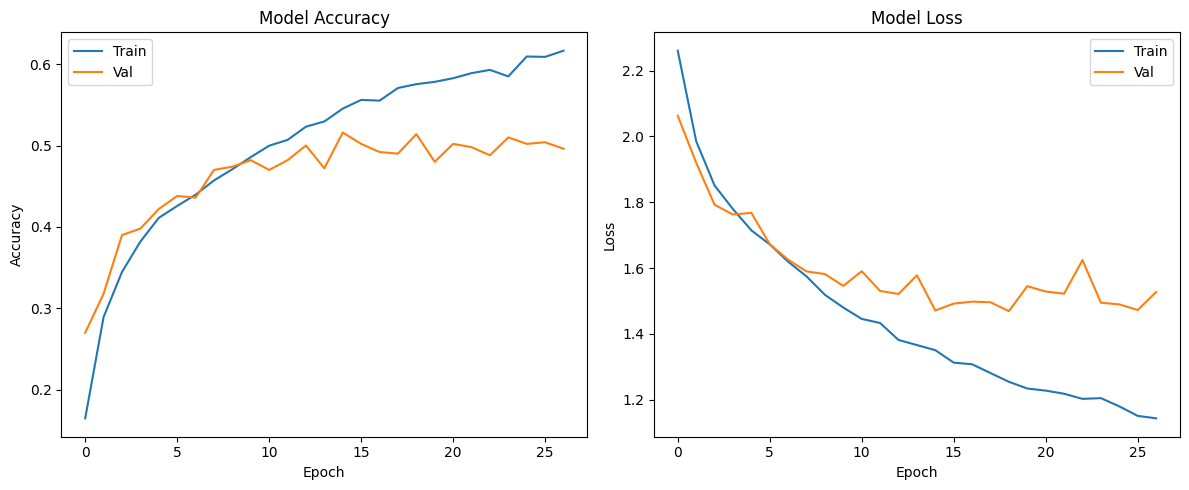

INFO:final_model:Confusion matrix plot saved to hyperparam_logs/confusion_matrix_20250403_185351.png


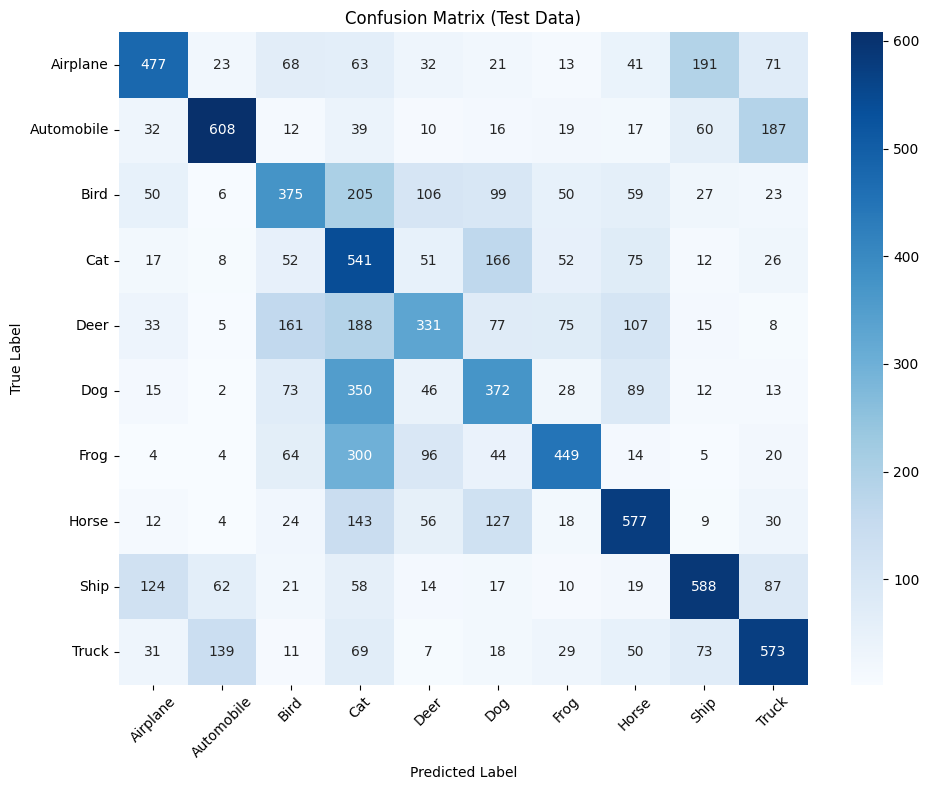

In [19]:
# Train final model with best hyperparameters
best_hyperparams = best_hyperparams_prs if best_loss_prs < best_loss_grs else best_hyperparams_grs
best_batch_size = int(best_hyperparams[0])
best_learning_rate = best_hyperparams[1]
best_beta_1 = best_hyperparams[2]
best_beta_2 = best_hyperparams[3]
best_epochs = int(best_hyperparams[4])

final_logger = logging.getLogger('final_model')
final_logger.setLevel(logging.INFO)
final_handler = logging.FileHandler(f'{log_dir}/final_models.log')
final_formatter = logging.Formatter('%(asctime)s - [Run:%(run_id)s] - %(message)s')
final_handler.setFormatter(final_formatter)
final_logger.addHandler(final_handler)
final_adapted_logger = RunAdapter(final_logger, {'run_id': run_id})

final_adapted_logger.info("Training final model with best hyperparameters:")
final_adapted_logger.info(f"Batch Size: {best_batch_size}")
final_adapted_logger.info(f"Learning Rate: {best_learning_rate:.6f}")
final_adapted_logger.info(f"Beta 1: {best_beta_1:.6f}")
final_adapted_logger.info(f"Beta 2: {best_beta_2:.6f}")
final_adapted_logger.info(f"Epochs: {best_epochs}")

print("\nTraining final model with best hyperparameters...")
final_model = keras.Sequential([
    layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=input_shape),
    layers.Conv2D(16, (3,3), strides=(2,2), padding='same', activation='relu'),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.Conv2D(32, (3,3), strides=(2,2), padding='same', activation='relu'),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l1(0.0001))
])

final_optimizer = keras.optimizers.Adam(
    learning_rate=best_learning_rate,
    beta_1=best_beta_1,
    beta_2=best_beta_2
)

final_model.compile(loss="categorical_crossentropy", optimizer=final_optimizer, metrics=["accuracy"])

# Custom callback for final model training logging
class FinalModelLoggingCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        final_adapted_logger.info(f"Epoch {epoch+1}/{best_epochs}: loss={logs['loss']:.4f}, "
                         f"val_loss={logs['val_loss']:.4f}, "
                         f"accuracy={logs['accuracy']:.4f}, "
                         f"val_accuracy={logs['val_accuracy']:.4f}")

# Train final model
history = final_model.fit(
    x_train, y_train_cat,
    batch_size=best_batch_size,
    epochs=best_epochs,
    validation_split=0.1,
    callbacks=[FinalModelLoggingCallback()],
    verbose=1  # Show progress bars for final training
)

# Save the final model
model_path = f"{log_dir}/best_model_{run_id}.keras"
final_model.save(model_path)
final_adapted_logger.info(f"Model saved to {model_path}")

# Evaluate final model
test_preds = final_model.predict(x_test)
y_test_pred = np.argmax(test_preds, axis=1)
test_report = classification_report(np.argmax(y_test_cat, axis=1), y_test_pred)
print("Classification Report (Test):")
print(test_report)
final_adapted_logger.info("Classification Report (Test):\n" + test_report)

# Calculate and log final metrics
test_loss, test_acc = final_model.evaluate(x_test, y_test_cat, verbose=0)
final_adapted_logger.info(f"Final test loss: {test_loss:.4f}")
final_adapted_logger.info(f"Final test accuracy: {test_acc:.4f}")

# Plot and save the training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
history_plot_path = f"{log_dir}/training_history_{run_id}.png"
plt.savefig(history_plot_path)
final_adapted_logger.info(f"Training history plot saved to {history_plot_path}")
plt.show()

# Plot and save confusion matrix
cm = confusion_matrix(np.argmax(y_test_cat, axis=1), y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                        'Dog', 'Frog', 'Horse', 'Ship', 'Truck'],
            yticklabels=['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                        'Dog', 'Frog', 'Horse', 'Ship', 'Truck'])
plt.title('Confusion Matrix (Test Data)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45)
plt.tight_layout()

cm_plot_path = f"{log_dir}/confusion_matrix_{run_id}.png"
plt.savefig(cm_plot_path)
final_adapted_logger.info(f"Confusion matrix plot saved to {cm_plot_path}")
plt.show()

### (c) Hyperparameter Optimization for the Conv Net Model

#### Implementation Strategy

The hyperparameter optimization process utilized two stochastic search algorithms to tune key hyperparameters of the CNN. The hyperparameters under consideration were:

1. **Mini-batch size** (ranging from 16 to 256)  
2. **Adam optimizer parameters:**  
   - **Learning rate (α):** from 0.0001 to 0.01  
   - **β₁:** from 0.8 to 0.99  
   - **β₂:** from 0.9 to 0.9999  
3. **Number of epochs:** from 5 to 30

**Global Random Search (GRS):**  
- **Algorithm:**
  1. **Input:** A cost function (validation loss), the number of hyperparameters, and their respective bounds.
  2. **Sampling:** Uniform sampling of candidate hyperparameter vectors within specified bounds.
  3. **Evaluation:** CNN building and training with each candidate while logging validation loss, training time, and performance metrics.
  4. **Selection:** Selection of the candidate achieving the lowest validation loss.
- **Logging:** Logs contain each candidate's hyperparameters, cost, evaluation time, and progress.

**Population-Based Random Search (PRS):**  
- **Algorithm:**
  1. **Initialization:** Random generation of initial hyperparameter candidate population from defined bounds.
  2. **Evolution:** Over fixed generations, population sorting by validation loss, selection of top \( M \) candidates, and creation of new candidates through perturbation within a small neighborhood.
  3. **Evaluation:** Model training with each new candidate, performance logging, and population updates.
  4. **Selection:** Selection of the candidate with lowest validation loss from final generation.
- **Logging:** Performance logging across generations for each candidate, providing search dynamics insights.

#### Search Space Explored

The hyperparameter search space encompassed a broad range of configurations:
- **Batch Size:** 16 to 256  
  Range covering very small mini-batches to large batches, affecting training variance and memory requirements.
- **Learning Rate:** 0.0001 to 0.01  
  Range from low learning rates to moderately high rates, affecting convergence speed and optimization stability.
- **β₁:** 0.8 to 0.99 and **β₂:** 0.9 to 0.9999  
  Bounds exploring different momentum dynamics in the Adam optimizer.
- **Epochs:** 5 to 30  
  Range balancing between rapid evaluation and model convergence depth.

The extensive search space results in many hyperparameter combinations yielding similar performance levels. While optimal configurations may achieve very low validation loss, the overall average cost across multiple runs remains higher. A narrower search space could potentially yield more significant improvements, with the trade-off of potentially missing unexpected beneficial configurations.

#### Performance Comparison

The logged metrics and convergence plots reveal:

- **Best Validation Loss:**  
  - *Global RS:* 1.515856  
  - *Population RS:* 1.459570  
  - *Difference (PRS - GRS):* –0.056286  
  PRS achieved marginally lower loss through iterative refinement.

- **Total Evaluations and Time:**  
  - *Global RS:* 20 evaluations; ~235.50 seconds total  
  - *Population RS:* 74 evaluations; ~913.53 seconds total  
  - *Difference:* PRS required 54 additional evaluations and approximately 678 seconds more.

- **Average Evaluation Time:**  
  - Global RS: ~11.78 seconds/evaluation  
  - Population RS: ~12.35 seconds/evaluation  
  Similar evaluation times indicate extra PRS evaluations stem from multiple generations rather than slower individual evaluations.

- **Convergence Behavior:**  
  The convergence plots indicate:
  - Similar losses between GRS and PRS at early checkpoints
  - PRS gradually discovers lower-loss configurations compared to GRS
  - Average loss remains higher for stochastic methods despite some near-optimal runs

#### Final Model Performance Comparison

Post-hyperparameter tuning results compared to the original model:

- **Original Model (Baseline):**  
  - Test Accuracy: ~50%  
  - Test Loss: 1.3943  
  - Test AUC: 0.8885

- **Final Model (Post-Random Search):**  
  - Test Accuracy: ~49%  
  - Test Loss: ~1.4904  
  - Test Accuracy (logged): ~48.91%

The modest performance change can be attributed to the vast search space, where many configurations resulted in similar performance levels.

#### Summary and Insights

- **Trade-Offs:**  
  - **Global RS**: Simpler and faster execution with potential missed optimal configurations
  - **Population RS**: More sophisticated approach yielding slightly lower validation loss at increased computational cost
  
- **Convergence:**  
  PRS demonstrates capability to find better candidates than GRS, though average cost remains higher due to variability.

- **Search Space Considerations:**  
  The broad search space allowed extensive configuration testing but resulted in modest improvements. A more restricted range could potentially yield better performance.

The experiments demonstrate the balance between exploration and exploitation in hyperparameter optimization. While PRS shows advantages in finding lower validation loss, the extensive search space constrains final model performance improvements. Future experiments could benefit from a narrower search range for further performance refinement.

---
